## Download and clean data

In [10]:
import pandas as pd
from numba import jit 
from data import BinanceAPI
from binance.client import Client

# import visual tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn-talk')
plt.style.use('bmh')

In [2]:
binance = BinanceAPI()

In [ ]:
binance.minute_bar(symbol='BTCUSDT',begin = '1 Jan 2018', end='1 Jan 2023')

In [15]:
df = pd.read_parquet('./data/BTCUSDT_1Min.parq')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2621433 entries, 2018-01-01 00:00:00 to 2023-01-01 00:00:00
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   open    object
 1   high    object
 2   low     object
 3   close   object
 4   volume  object
dtypes: object(5)
memory usage: 120.0+ MB


In [16]:
# Specify column to convert
columns_to_convert = ['open', 'high', 'low', 'close', 'volume']

# Convert specified columns to float64
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Verify the data types after conversion
print(df.dtypes)


open      float64
high      float64
low       float64
close     float64
volume    float64
dtype: object


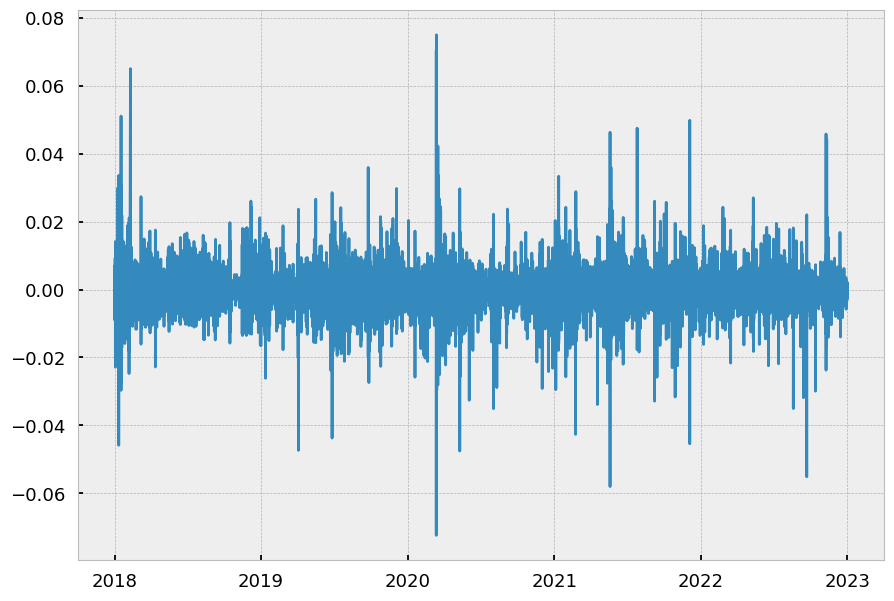

In [25]:
normal_test = df.copy()
normal_test['rets'] = normal_test.close.pct_change()
normal_test.dropna(inplace=True)
plt.plot(normal_test.rets)

In [6]:
df['v'] = df['volume']
df['dv'] = df['volume']*df['close']
df.head()

,open,high,low,close,volume,v,dv
timestamp,,,,,,,
2018-01-01 00:00:00,13715.65,13715.65,13681.00,13707.92,2.844266,2.844266,38988.970787
2018-01-01 00:01:00,13707.91,13707.91,13666.11,13694.92,2.113138,2.113138,28939.255859
2018-01-01 00:02:00,13682.00,13694.94,13680.00,13680.00,1.346411,1.346411,18418.902480
2018-01-01 00:03:00,13679.98,13679.98,13601.00,13645.99,11.589417,11.589417,158149.068488
2018-01-01 00:04:00,13645.98,13646.00,13576.28,13600.00,15.724566,15.724566,213854.097600


<AxesSubplot:xlabel='close'>

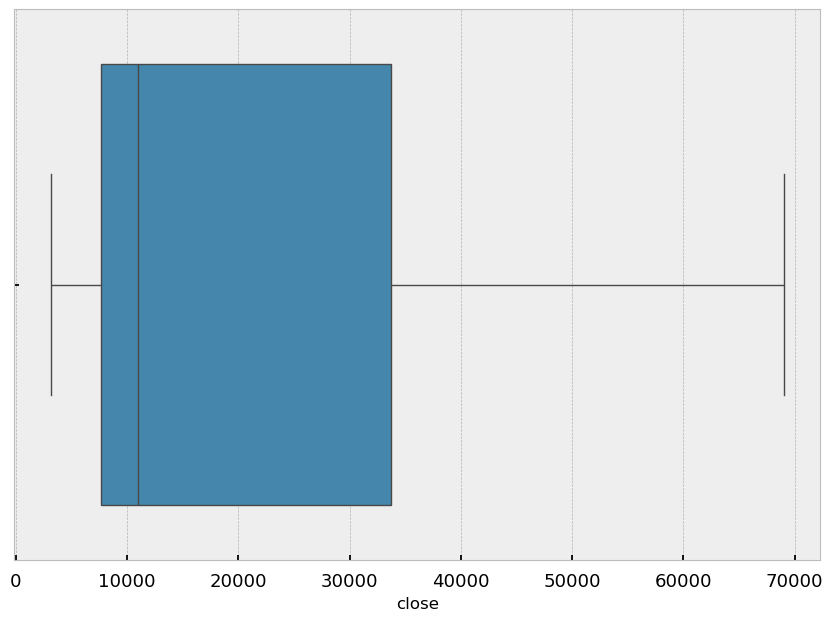

In [9]:
# Visualize the anormallies
sns.boxplot(df.close, orient='h')

---

## Create Tick Bars

The function `tick_bars` simply find the column index of the trade where the total volumn reaches a certain threatshold

In [11]:
def tick_bars(df, price_column, m):
    '''
    compute tick bars

    # args
        df: pd.DataFrame()
        column: name for price data
        m: int(), threshold value for ticks
    # returns
        idx: list of indices
    '''
    t = df[price_column]
    ts = 0
    idx = []
    for i, x in enumerate(t):
        ts += 1
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def tick_bar_df(df, price_column, m):
    idx = tick_bars(df, price_column, m)
    return df.iloc[idx].drop_duplicates()